In [1]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
print(sns.__version__)
%matplotlib inline
titanic_train = pd.read_csv('./titanic/train.csv', index_col=0)
titanic_test = pd.read_csv('./titanic/test.csv', index_col=0)

0.11.1


In [2]:
print(titanic_train.shape)
print(titanic_train.info())

(891, 11)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB
None


In [3]:
titanic_train.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
#Categorical Columns like Pclasss , Sex , Embarked , Sruvived …
#Continuous Columns like Fare , Age ..
#Requirement : I need count of Survived vs Not Survived.
pd.crosstab(titanic_train.Survived,columns='count',margins=True)

col_0,count,All
Survived,,
0,549,549
1,342,342
All,891,891


In [5]:
pd.crosstab(titanic_train.Survived,columns='count',margins=False)

col_0,count
Survived,
0,549
1,342


In [6]:
#Requirement: All Numerical columns basic statistics.
titanic_train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
#Single Numeric column basic statistics
titanic_train.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [8]:
#Single non Numeric column basic statistics
titanic_train.Name.describe()

count                          891
unique                         891
top       Goldenberg, Mr. Samuel L
freq                             1
Name: Name, dtype: object

<AxesSubplot:xlabel='Survived', ylabel='count'>

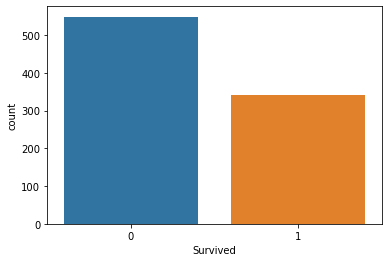

In [9]:
#Requirement : Show me in Graph how many survived vs not Survived. SeaBorn sns
sns.countplot(data=titanic_train,x="Survived")

<AxesSubplot:xlabel='Embarked', ylabel='count'>

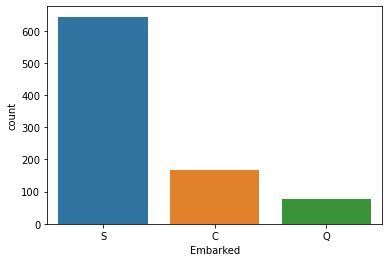

In [10]:
sns.countplot(data=titanic_train,x="Embarked")

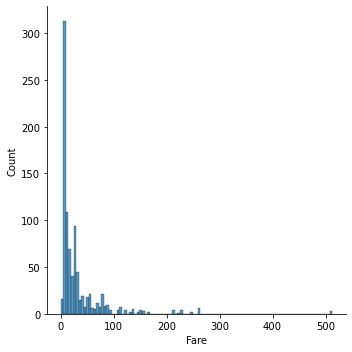

In [11]:
#Requirement: Give me distribution plot for Fare (Continuous) Column
sns.displot(data=titanic_train.Fare)

In [12]:
#equirement: Give me KDE plot for Fare (Continuous) Column

In [14]:
 
#ggplot(comb %>% dplyr::filter(), aes(Pclass,fill=!is.na(Age))) + geom_bar(position="dodge") + labs(title="Passenger Has Age",fill="Has Age") 
#ggplot(comb %>% dplyr::filter(), aes(Pclass,fill=!is.na(Age))) + geom_bar(position="dodge") + labs(title="Passenger Has Age",fill="Has Age") 


SyntaxError: invalid syntax (<ipython-input-14-775ed7dfd5b9>, line 2)

In [ ]:
rm(list = ls())
library(data.table)
library(ggplot2)
suppressMessages(library(dplyr))
suppressMessages(library(gridExtra))

# read raw data
train  <- read.csv("../input/train.csv");
test   <- read.csv("../input/test.csv");
# Join the test and train sets for joint pre-processing of features
# Create an indicator tag for train and test sets
test$Survived <- NA;
test$Set  <- "Test";
train$Set <- "Train";
comb <- rbind(train, test);